In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import env

# Acquire the Data

In [3]:
def get_connection(db, user=env.user, host=env.host, password=env.password):
    
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [4]:
def acquire_codeup():
    '''
    Grab our data from path and read as dataframe
    '''
    
    df = pd.read_sql('''
                        select *
                        from logs
                        join cohorts on logs.cohort_id = cohorts.id''', get_connection('curriculum_logs'))
    return df

In [5]:
df = acquire_codeup()
df.head()

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2


# Prepare the Data

In [6]:
df.shape

(847330, 15)

Rename:
- name to cohort_name
    - so not to get confused wiht other names
- ip to ip_address
    - just for me
- path to webpage_accessed
    - because I like it
- id to class_type_id
    - specifies what it is

In [7]:
df = df.rename(columns={'ip':'ip_address', 'name':'cohort_name', 
                        'path':'webpage_accessed'})

In [8]:
df.head()

,date,time,webpage_accessed,user_id,cohort_id,ip_address,id,cohort_name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2


- Merge the date and time together and make the new datetime format the index

In [9]:
df.index = pd.to_datetime(df.date + " " + df.time)

In [10]:
df.head()

,date,time,webpage_accessed,user_id,cohort_id,ip_address,id,cohort_name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
2018-01-26 09:55:03,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
2018-01-26 09:56:02,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
2018-01-26 09:56:05,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
2018-01-26 09:56:06,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
2018-01-26 09:56:24,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2


- Drop the left over date and time features because we now have them both under index

In [11]:
df = df.drop(columns=['date','time'], axis=1)

In [12]:
df.head()

,webpage_accessed,user_id,cohort_id,ip_address,id,cohort_name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
2018-01-26 09:55:03,/,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2


In [13]:
df.isnull().sum()

webpage_accessed         1
user_id                  0
cohort_id                0
ip_address               0
id                       0
cohort_name              0
slack                    0
start_date               0
end_date                 0
created_at               0
updated_at               0
deleted_at          847330
program_id               0
dtype: int64

Drop:
- slack
    - because it is not helpful
- created_at 
    - because it is not helpful
- updated_at
    - because it is not helpful
- deleted_at
    - because it is like 98% null values

In [14]:
df = df.drop(['slack', 'created_at', 'updated_at', 'deleted_at', 'id'], axis=1)
df.head()

,webpage_accessed,user_id,cohort_id,ip_address,cohort_name,start_date,end_date,program_id
2018-01-26 09:55:03,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2


In [15]:
df.isnull().sum()

webpage_accessed    1
user_id             0
cohort_id           0
ip_address          0
cohort_name         0
start_date          0
end_date            0
program_id          0
dtype: int64

- There is one null in webpage
    - just going to drop it 

In [16]:
df = df.dropna()
df.isnull().sum()

webpage_accessed    0
user_id             0
cohort_id           0
ip_address          0
cohort_name         0
start_date          0
end_date            0
program_id          0
dtype: int64

#### class_type_id:
- 1
    - Full Stack PHP
- 2 
    - Full Stack Java
- 3
    - Data Science
- 4 
    - Front end

In [17]:
# create a class type name feature

In [18]:
# create a class type name feature
df['program_type'] = df.program_id.replace(1,'PHP').replace(2,'Java').replace(3,'Data Science').replace(4,'Front End')

In [19]:
df.head()

,webpage_accessed,user_id,cohort_id,ip_address,cohort_name,start_date,end_date,program_id,program_type
2018-01-26 09:55:03,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,PHP
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,PHP
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,PHP
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,PHP
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2,Java


In [20]:
df = acquire_codeup()

def clean_codeup(df):
    '''Takes in pandas dataframe
    rename columns from 0-5 to readable names
    set index in datetime format
    drop og date and time features
    replace null cohort_id's with 0
    drop the one null on webpage
    '''
    # Rename the columns
    df = df.rename(columns={'ip':'ip_address', 'name':'cohort_name', 
                        'path':'webpage_accessed'})
    # Index datetime
    df.index = pd.to_datetime(df.date + " " + df.time)
    # Drop thye OG date and time features
    df = df.drop(columns=['date','time'], axis=1)
    # drop uneeded columns
    df = df.drop(['slack', 'created_at', 'updated_at', 'deleted_at', 'id'], axis=1)
    # drop remaining null value
    df = df.dropna()
    # creeate new feature to hold the program name
    df['program_type'] = df.program_id.replace(1,'PHP').replace(2,'Java').replace(3,'Data Science').replace(4,'Front End')
    # create month and year feature
    df['month'] = df.index.month
    df['month'] = df.month.replace(12,'December').replace(1,'January').replace(2,'February').replace(3,'March').replace(4,'April').replace(5,'May').replace(6,'June')
    df['year'] = df.index.year
    df['weekday'] = df.index.weekday
    df['weekday'] = df.weekday.replace(0,'Monday').replace(1,'Tuesday').replace(2,'Wednesday').replace(3,'Thursday').replace(4,'Friday').replace(5,'Saturday').replace(6,'Sunday')
    return df

df = clean_codeup(df)

In [21]:
df.head()

,webpage_accessed,user_id,cohort_id,ip_address,cohort_name,start_date,end_date,program_id,program_type,month,year,weekday
2018-01-26 09:55:03,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,PHP,January,2018,Friday
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,PHP,January,2018,Friday
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,PHP,January,2018,Friday
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,PHP,January,2018,Friday
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2,Java,January,2018,Friday


# Explore

## Focus on Easley

In [22]:
easley_cohort = df[df['cohort_name'] == "Easley"]
easley_cohort.head()

,webpage_accessed,user_id,cohort_id,ip_address,cohort_name,start_date,end_date,program_id,program_type,month,year,weekday
2020-12-08 10:49:37,/,835,133.0,173.173.109.5,Easley,2020-12-07,2021-06-08,3,Data Science,December,2020,Tuesday
2020-12-08 10:49:39,/,836,133.0,99.43.137.186,Easley,2020-12-07,2021-06-08,3,Data Science,December,2020,Tuesday
2020-12-08 10:49:40,/,837,133.0,66.69.79.82,Easley,2020-12-07,2021-06-08,3,Data Science,December,2020,Tuesday
2020-12-08 10:49:52,/,838,133.0,99.158.249.67,Easley,2020-12-07,2021-06-08,3,Data Science,December,2020,Tuesday
2020-12-08 10:50:16,/,839,133.0,130.45.49.89,Easley,2020-12-07,2021-06-08,3,Data Science,December,2020,Tuesday


/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 [Text(0, 0, 'Hampton'),
  Text(1, 0, 'Teddy'),
  Text(2, 0, 'Sequoia'),
  Text(3, 0, 'Arches'),
  Text(4, 0, 'Niagara'),
  Text(5, 0, 'Pinnacles'),
  Text(6, 0, 'Quincy'),
  Text(7, 0, 'Kings'),
  Text(8, 0, 'Lassen'),
  Text(9, 0, 'Mammoth'),
  Text(10, 0, 'Glacier'),
  Text(11, 0, 'Denali'),
  Text(12, 0, 'Joshua'),
  Text(13, 0, 'Olympic'),
  Text(14, 0, 'Ulysses'),
  Text(15, 0, 'Badlands'),
  Text(16, 0, 'Apollo'),
  Text(17, 0, 'Ike'),
  Text(18, 0, 'Voyageurs'),
  Text(19, 0, 'Wrangell'),
  Text(20, 0, 'Xanadu'),
  Text(21, 0, 'Franklin'),
  Text(22, 0, 'Yosemite'),
  Text(23, 0, 'Staff'),
  Text(24, 0, 'Zion'),
  Text(25, 0, 'Andromeda'),
  Text(26, 0, 'Betelgeuse'),
  Text(27, 0, 'Ceres'),
  Text(28, 0, 'Bayes'),
  Text(29, 0, 'Deimos'),
  Text(30, 0, 'Europa'),
  T

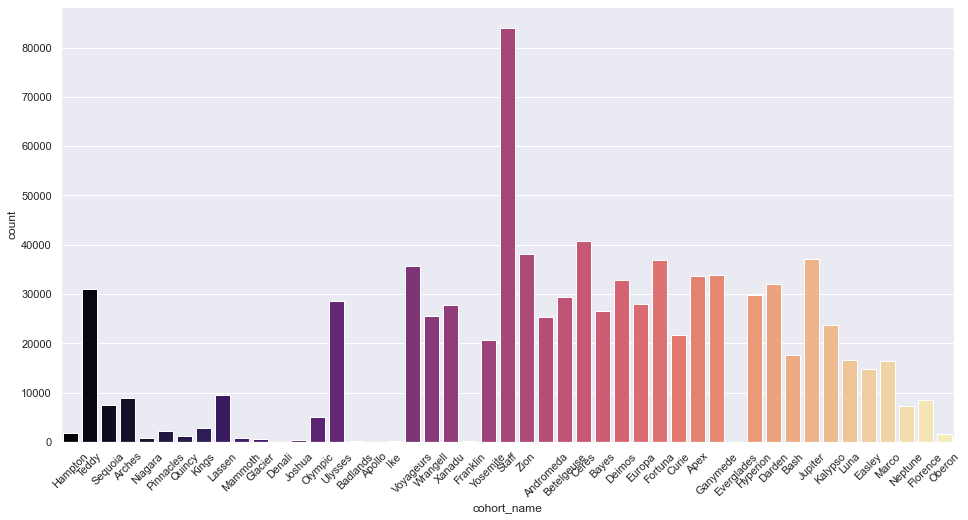

In [23]:
plt.figure(figsize=(16,8))
sns.set(style="darkgrid")
sns.countplot(df.cohort_name, palette='magma')
plt.xticks(rotation=45)

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, '143'),
  Text(1, 0, '835'),
  Text(2, 0, '836'),
  Text(3, 0, '837'),
  Text(4, 0, '838'),
  Text(5, 0, '839'),
  Text(6, 0, '840'),
  Text(7, 0, '841'),
  Text(8, 0, '842'),
  Text(9, 0, '843'),
  Text(10, 0, '844'),
  Text(11, 0, '845'),
  Text(12, 0, '846'),
  Text(13, 0, '847'),
  Text(14, 0, '848'),
  Text(15, 0, '849'),
  Text(16, 0, '851')])

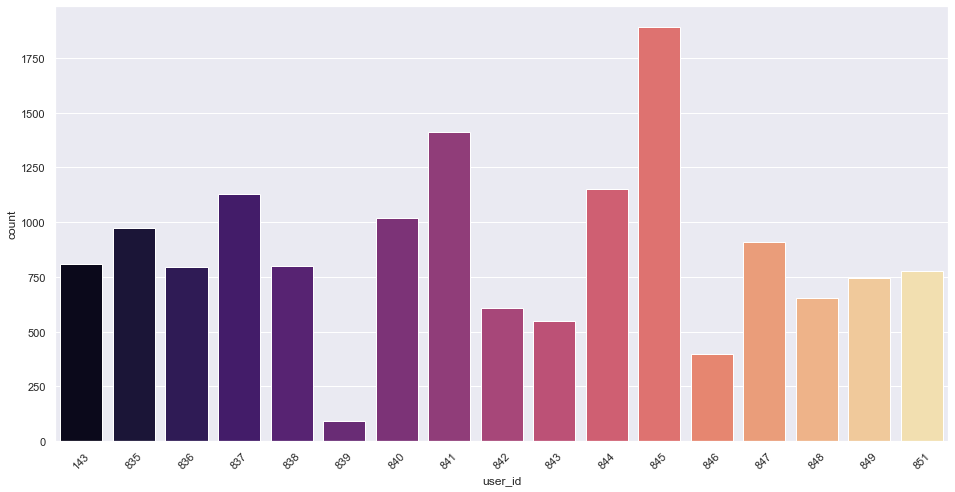

In [24]:
plt.figure(figsize=(16,8))
sns.set(style="darkgrid")
sns.countplot(easley_cohort.user_id, palette='magma')
plt.xticks(rotation=45)

## Check out my Stats

In [25]:
caitlyn = df[(df['user_id'] == 843)]
caitlyn.head()

,webpage_accessed,user_id,cohort_id,ip_address,cohort_name,start_date,end_date,program_id,program_type,month,year,weekday
2020-12-08 10:51:01,/,843,133.0,172.58.99.111,Easley,2020-12-07,2021-06-08,3,Data Science,December,2020,Tuesday
2020-12-08 10:58:30,fundamentals/intro-to-data-science,843,133.0,172.58.99.111,Easley,2020-12-07,2021-06-08,3,Data Science,December,2020,Tuesday
2020-12-08 10:58:31,fundamentals/modern-data-scientist.jpg,843,133.0,172.58.99.111,Easley,2020-12-07,2021-06-08,3,Data Science,December,2020,Tuesday
2020-12-08 10:58:31,fundamentals/AI-ML-DL-timeline.jpg,843,133.0,172.58.99.111,Easley,2020-12-07,2021-06-08,3,Data Science,December,2020,Tuesday
2020-12-08 13:09:05,fundamentals/modern-data-scientist.jpg,843,133.0,172.58.99.111,Easley,2020-12-07,2021-06-08,3,Data Science,December,2020,Tuesday


<AxesSubplot:>

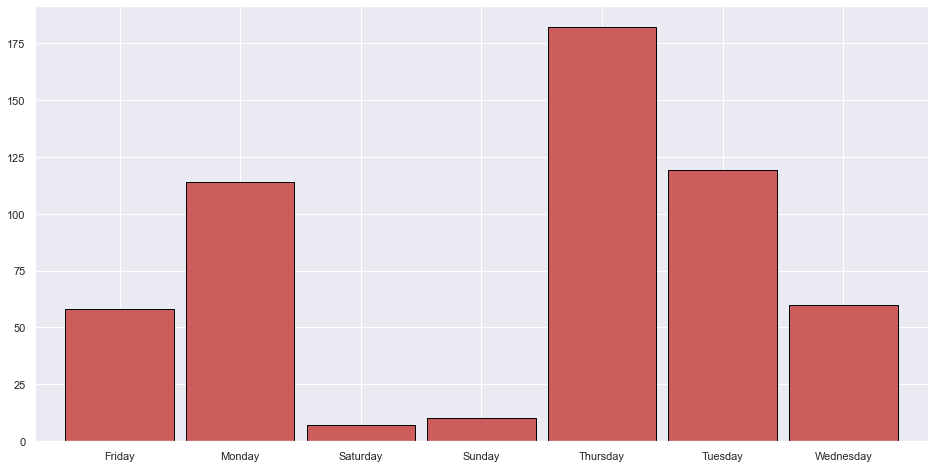

In [26]:
plt.figure(figsize=(16,8))
caitlyn.weekday.value_counts().sort_index().plot.bar(rot=0, width=.9, color='indianred',ec='black')

In [37]:
#plt.figure(figsize=(16,8))
#peers.weekday.mean().sort_index().plot.bar(rot=0, width=.9, color='indianred',ec='black')

<AxesSubplot:>

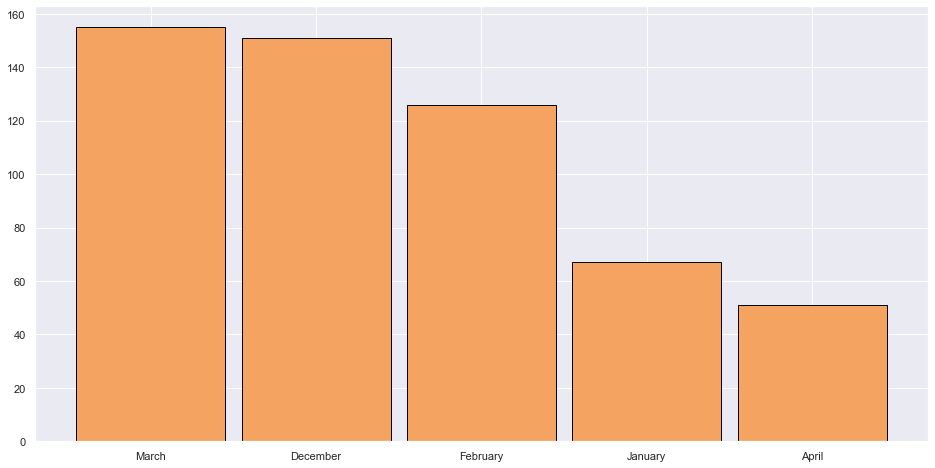

In [38]:
plt.figure(figsize=(16,8))
df[df['user_id'] == 843].month.value_counts().plot.bar(rot=0, width=0.9, color='sandybrown',ec='black')

## Look at Programs

In [39]:
df.program_type.value_counts()

Java            713365
Data Science    103411
PHP              30548
Front End            5
Name: program_type, dtype: int64

In [40]:
df[df.program_type == 'Java'].webpage_accessed.value_counts().head(10)

/                           35814
javascript-i                17457
toc                         17428
search/search_index.json    15212
java-iii                    12683
html-css                    12569
java-ii                     11719
spring                      11376
jquery                      10693
mysql                       10318
Name: webpage_accessed, dtype: int64

In [41]:
df[df.program_type == 'Data Science'].webpage_accessed.value_counts().head(10)

/                                           8358
search/search_index.json                    2203
classification/overview                     1785
1-fundamentals/modern-data-scientist.jpg    1655
1-fundamentals/AI-ML-DL-timeline.jpg        1651
1-fundamentals/1.1-intro-to-data-science    1633
classification/scale_features_or_not.svg    1590
fundamentals/AI-ML-DL-timeline.jpg          1443
fundamentals/modern-data-scientist.jpg      1438
sql/mysql-overview                          1424
Name: webpage_accessed, dtype: int64

In [42]:
df[df.program_type == 'PHP'].webpage_accessed.value_counts().head(10)

/                1681
index.html       1011
javascript-i      736
html-css          542
spring            501
java-iii          479
java-ii           454
java-i            444
javascript-ii     429
appendix          409
Name: webpage_accessed, dtype: int64

In [43]:
df[df.program_type == 'Front End'].webpage_accessed.value_counts().head(10)

content/html-css                               2
/                                              1
content/html-css/gitbook/images/favicon.ico    1
content/html-css/introduction.html             1
Name: webpage_accessed, dtype: int64

plt.figure(figsize=(16,8))
sns.set(style="darkgrid")
sns.countplot(train.program_type, palette='magma')
plt.xticks(rotation=45)

## Check out the Staff

In [46]:
staff = df[(df['cohort_name'] == 'Staff')]
staff.head()

,webpage_accessed,user_id,cohort_id,ip_address,cohort_name,start_date,end_date,program_id,program_type,month,year,weekday
2018-12-06 14:15:29,appendix/further-reading/java/intellij-tomcat-...,53,28.0,97.105.19.58,Staff,2014-02-04,2014-02-04,2,Java,December,2018,Thursday
2018-12-06 14:25:40,javascript-i,314,28.0,97.105.19.58,Staff,2014-02-04,2014-02-04,2,Java,December,2018,Thursday
2018-12-06 14:25:41,javascript-i/coffee-project,314,28.0,97.105.19.58,Staff,2014-02-04,2014-02-04,2,Java,December,2018,Thursday
2018-12-06 15:31:29,spring,40,28.0,170.248.173.247,Staff,2014-02-04,2014-02-04,2,Java,December,2018,Thursday
2018-12-06 15:31:33,spring/fundamentals/security,40,28.0,170.248.173.247,Staff,2014-02-04,2014-02-04,2,Java,December,2018,Thursday


/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='user_id', ylabel='count'>

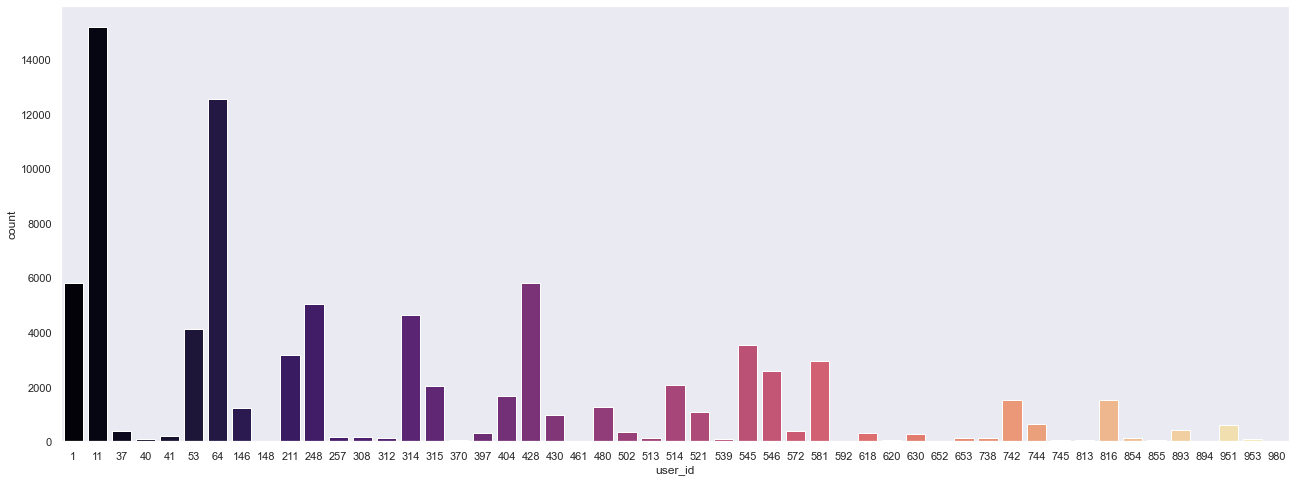

In [53]:
plt.figure(figsize=(22,8))
sns.set(style="dark")
sns.countplot(staff.user_id, palette='magma')

### Takeaways:
- I speculate the user_id 11 is Zach Guilde
    - Because Zach creates the curriculum I suspect he is looking at it on a regular basis.

<AxesSubplot:>

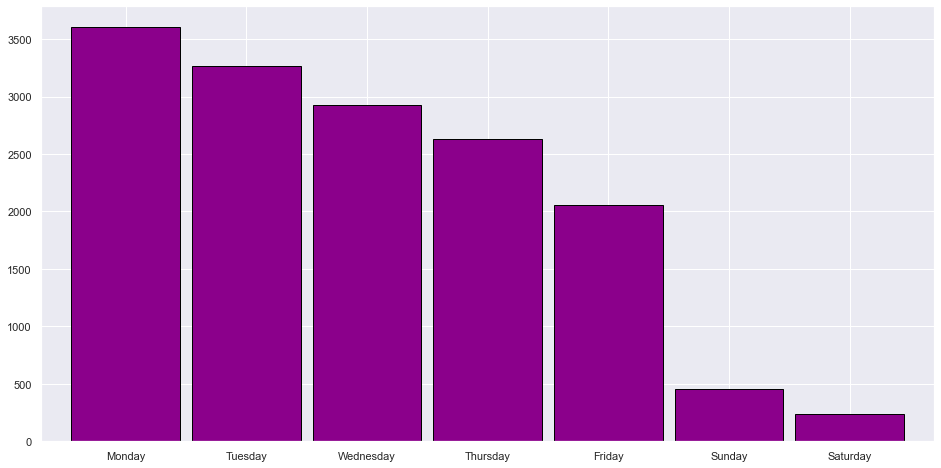

In [64]:
plt.figure(figsize=(16,8))
staff[staff['user_id'] == 11].weekday.value_counts().plot.bar(rot=0, width=0.9, color='darkmagenta',ec='black')

<AxesSubplot:>

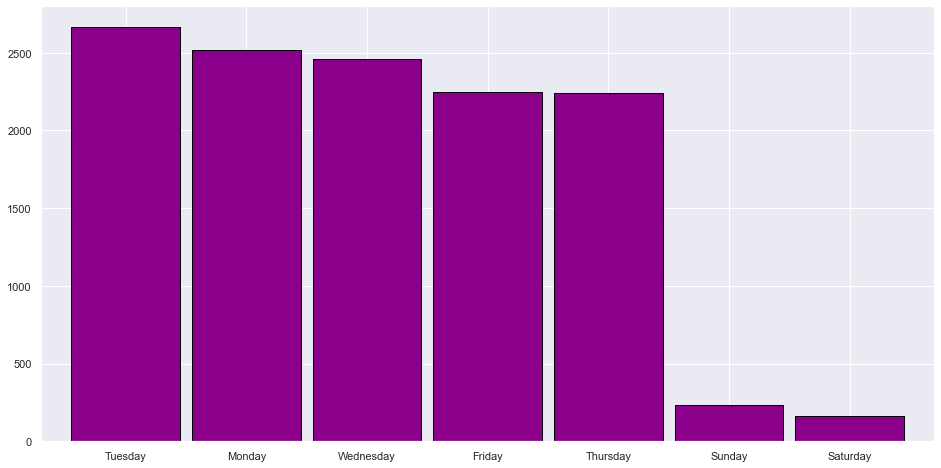

In [65]:
plt.figure(figsize=(16,8))
staff[staff['user_id'] == 64].weekday.value_counts().plot.bar(rot=0, width=0.9, color='darkmagenta',ec='black')